In [8]:
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler


key="use your kiggle api key" 12653bd1af6c9aaa2eb6741c51302dc9260a7087

In [9]:
df = pdr.get_data_tiingo('GOGL', api_key=key)

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [10]:
df.to_csv('GOGL.csv')

In [11]:
df=pd.read_csv('GOGL.csv')

In [12]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOGL,2017-09-11 00:00:00+00:00,9.62,9.72,9.580,9.66,171272,6.092621,6.155953,6.067287,6.117954,171272,0.0,1.0
1,GOGL,2017-09-12 00:00:00+00:00,9.15,9.36,9.070,9.26,192274,5.794956,5.927955,5.744290,5.864622,192274,0.0,1.0
2,GOGL,2017-09-13 00:00:00+00:00,8.78,8.95,8.680,8.95,408708,5.560625,5.668290,5.497292,5.668290,408708,0.0,1.0
3,GOGL,2017-09-14 00:00:00+00:00,9.04,9.07,8.854,8.89,171390,5.725290,5.744290,5.607491,5.630291,171390,0.0,1.0
4,GOGL,2017-09-15 00:00:00+00:00,8.98,9.02,8.870,8.96,218786,5.687290,5.712623,5.617624,5.674624,218786,0.0,1.0


In [13]:
df1=df.reset_index()['close']

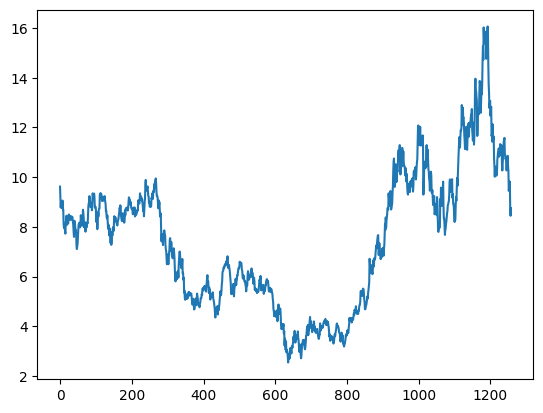

In [14]:
plt.plot(df1)

In [15]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
print(df1)

[[0.52331606]
 [0.48852702]
 [0.4611399 ]
 ...
 [0.45743893]
 [0.43671355]
 [0.45891932]]


In [17]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [18]:
training_size,test_size

(817, 441)

In [19]:
train_data[:5]

array([[0.52331606],
       [0.48852702],
       [0.4611399 ],
       [0.4803849 ],
       [0.47594375]])

In [22]:
# convert an array of values into a dataset matrix
def dataset(data, time_step=1):
    data_X, data_Y = [], []
    for i in range(len(data)-time_step-1):
        a = data[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        data_X.append(a)
        data_Y.append(data[i + time_step, 0])
    return np.array(data_X), np.array(data_Y)

In [23]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = dataset(train_data, time_step)
X_test, ytest = dataset(test_data, time_step)

In [24]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [25]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [33]:
### Create the LSTM model (Long Short-Term Memory)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [34]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 17s 583ms/step - loss: 0.0267 - val_loss: 0.0629
Epoch 2/100
12/12 [==============================] - 4s 356ms/step - loss: 0.0057 - val_loss: 0.0081
Epoch 3/100
12/12 [==============================] - 4s 372ms/step - loss: 0.0024 - val_loss: 0.0076
Epoch 4/100
12/12 [==============================] - 5s 388ms/step - loss: 0.0018 - val_loss: 0.0080
Epoch 5/100
12/12 [==============================] - 4s 372ms/step - loss: 0.0015 - val_loss: 0.0078
Epoch 6/100
12/12 [==============================] - 4s 364ms/step - loss: 0.0014 - val_loss: 0.0080
Epoch 7/100
12/12 [==============================] - 4s 352ms/step - loss: 0.0014 - val_loss: 0.0068
Epoch 8/100
12/12 [==============================] - 4s 327ms/step - loss: 0.0014 - val_loss: 0.0068
Epoch 9/100
12/12 [==============================] - 4s 345ms/step - loss: 0.0014 - val_loss: 0.0067
Epoch 10/100
12/12 [==============================] - 4s 354ms/step - loss: 0.0013 - val_l

12/12 [==============================] - 4s 344ms/step - loss: 3.4664e-04 - val_loss: 0.0016
Epoch 80/100
12/12 [==============================] - 4s 372ms/step - loss: 3.2462e-04 - val_loss: 0.0021
Epoch 81/100
12/12 [==============================] - 4s 336ms/step - loss: 3.9508e-04 - val_loss: 0.0016
Epoch 82/100
12/12 [==============================] - 4s 342ms/step - loss: 3.3182e-04 - val_loss: 0.0017
Epoch 83/100
12/12 [==============================] - 4s 332ms/step - loss: 3.2167e-04 - val_loss: 0.0015
Epoch 84/100
12/12 [==============================] - 4s 340ms/step - loss: 2.9969e-04 - val_loss: 0.0015
Epoch 85/100
12/12 [==============================] - 4s 345ms/step - loss: 2.9909e-04 - val_loss: 0.0015
Epoch 86/100
12/12 [==============================] - 4s 342ms/step - loss: 2.9598e-04 - val_loss: 0.0015
Epoch 87/100
12/12 [==============================] - 4s 346ms/step - loss: 3.2171e-04 - val_loss: 0.0015
Epoch 88/100
12/12 [==============================] - 4s 34

In [37]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 1s 66ms/step


In [38]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [40]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

5.896158146308587

In [41]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

10.149084797856906

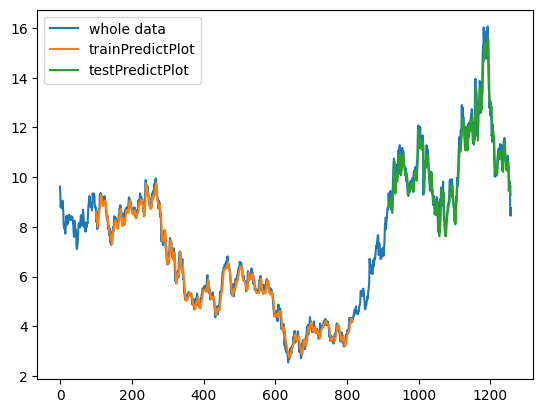

In [46]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1), label='whole data')
plt.plot(trainPredictPlot, label='trainPredictPlot')
plt.plot(testPredictPlot, label='testPredictPlot')
plt.legend()
plt.show()

In [47]:
len(test_data)

441

In [48]:
341 to 441, previous 100 data
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [49]:
temp_input=list(x_input) 
temp_input=temp_input[0].tolist()

In [51]:
temp_input[:5]

[0.8445595854922282,
 0.8105107327905255,
 0.8075499629903776,
 0.7912657290895634,
 0.7801628423390082]

In [65]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.77054034 0.77868246 0.73427091 0.75129534 0.76091784 0.67431532
 0.67801628 0.6572909  0.70910437 0.6669134  0.66321244 0.67283494
 0.60695781 0.58549223 0.55292376 0.58253146 0.58253146 0.57660992
 0.55588453 0.55662472 0.56106588 0.60103627 0.61509993 0.62620281
 0.6173205  0.6373057  0.61287935 0.6173205  0.6180607  0.64988897
 0.63656551 0.61954108 0.64766839 0.63360474 0.58993338 0.57142857
 0.58993338 0.61213916 0.63878608 0.6572909  0.66247224 0.66839378
 0.61954108 0.6180607  0.60547742 0.60843819 0.58771281 0.57142857
 0.59067358 0.58771281 0.61509993 0.58401184 0.56994819 0.51073279
 0.52109548 0.5388601  0.53811991 0.45743893 0.43671355 0.45891932
 0.44148415 0.43860042 0.43909851 0.44080445 0.44318897 0.44576925
 0.44806874 0.4497225  0.45050251 0.45030588 0.44913381 0.44706708
 0.44424012 0.44081646 0.436966   0.43284908 0.42860347 0.42433941
 0.42013672 0.41604692 0.41209662 0.40829313 0.40462881 0.40108693
 0.39764559 0.39428118 0.39097112 0.38769555 0.384

7 day output [[0.32255667]]
8 day input [0.70910437 0.6669134  0.66321244 0.67283494 0.60695781 0.58549223
 0.55292376 0.58253146 0.58253146 0.57660992 0.55588453 0.55662472
 0.56106588 0.60103627 0.61509993 0.62620281 0.6173205  0.6373057
 0.61287935 0.6173205  0.6180607  0.64988897 0.63656551 0.61954108
 0.64766839 0.63360474 0.58993338 0.57142857 0.58993338 0.61213916
 0.63878608 0.6572909  0.66247224 0.66839378 0.61954108 0.6180607
 0.60547742 0.60843819 0.58771281 0.57142857 0.59067358 0.58771281
 0.61509993 0.58401184 0.56994819 0.51073279 0.52109548 0.5388601
 0.53811991 0.45743893 0.43671355 0.45891932 0.44148415 0.43860042
 0.43909851 0.44080445 0.44318897 0.44576925 0.44806874 0.4497225
 0.45050251 0.45030588 0.44913381 0.44706708 0.44424012 0.44081646
 0.436966   0.43284908 0.42860347 0.42433941 0.42013672 0.41604692
 0.41209662 0.40829313 0.40462881 0.40108693 0.39764559 0.39428118
 0.39097112 0.38769555 0.38443807 0.38118646 0.37793246 0.37467098
 0.37140009 0.36812016 0.3

15 day output [[0.2975499]]
16 day input [0.58253146 0.57660992 0.55588453 0.55662472 0.56106588 0.60103627
 0.61509993 0.62620281 0.6173205  0.6373057  0.61287935 0.6173205
 0.6180607  0.64988897 0.63656551 0.61954108 0.64766839 0.63360474
 0.58993338 0.57142857 0.58993338 0.61213916 0.63878608 0.6572909
 0.66247224 0.66839378 0.61954108 0.6180607  0.60547742 0.60843819
 0.58771281 0.57142857 0.59067358 0.58771281 0.61509993 0.58401184
 0.56994819 0.51073279 0.52109548 0.5388601  0.53811991 0.45743893
 0.43671355 0.45891932 0.44148415 0.43860042 0.43909851 0.44080445
 0.44318897 0.44576925 0.44806874 0.4497225  0.45050251 0.45030588
 0.44913381 0.44706708 0.44424012 0.44081646 0.436966   0.43284908
 0.42860347 0.42433941 0.42013672 0.41604692 0.41209662 0.40829313
 0.40462881 0.40108693 0.39764559 0.39428118 0.39097112 0.38769555
 0.38443807 0.38118646 0.37793246 0.37467098 0.37140009 0.36812016
 0.36483267 0.36154053 0.35824677 0.35495472 0.35166726 0.34838679
 0.34511557 0.34185523 

23 day output [[0.27346152]]
24 day input [0.6173205  0.6373057  0.61287935 0.6173205  0.6180607  0.64988897
 0.63656551 0.61954108 0.64766839 0.63360474 0.58993338 0.57142857
 0.58993338 0.61213916 0.63878608 0.6572909  0.66247224 0.66839378
 0.61954108 0.6180607  0.60547742 0.60843819 0.58771281 0.57142857
 0.59067358 0.58771281 0.61509993 0.58401184 0.56994819 0.51073279
 0.52109548 0.5388601  0.53811991 0.45743893 0.43671355 0.45891932
 0.44148415 0.43860042 0.43909851 0.44080445 0.44318897 0.44576925
 0.44806874 0.4497225  0.45050251 0.45030588 0.44913381 0.44706708
 0.44424012 0.44081646 0.436966   0.43284908 0.42860347 0.42433941
 0.42013672 0.41604692 0.41209662 0.40829313 0.40462881 0.40108693
 0.39764559 0.39428118 0.39097112 0.38769555 0.38443807 0.38118646
 0.37793246 0.37467098 0.37140009 0.36812016 0.36483267 0.36154053
 0.35824677 0.35495472 0.35166726 0.34838679 0.34511557 0.34185523
 0.33860666 0.33537072 0.33214754 0.32893762 0.32574061 0.32255667
 0.31938556 0.316227

In [66]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [67]:
len(df1)

1258

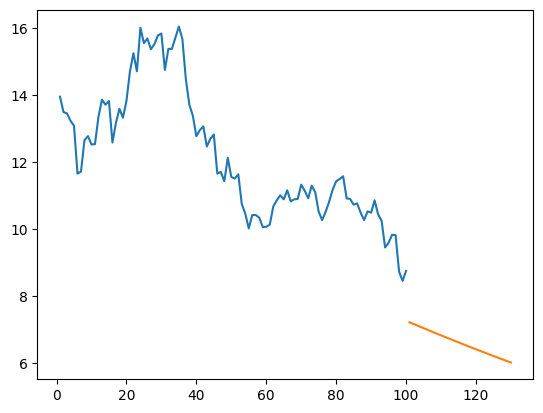

In [68]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))  # previous 100 data
plt.plot(day_pred,scaler.inverse_transform(lst_output))

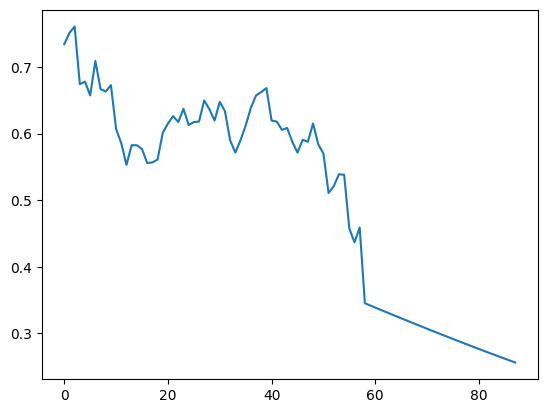

In [69]:
df3=df1.tolist() # combine next 30 days data
df3.extend(lst_output)
plt.plot(df3[1200:])

In [56]:
df3=scaler.inverse_transform(df3).tolist()

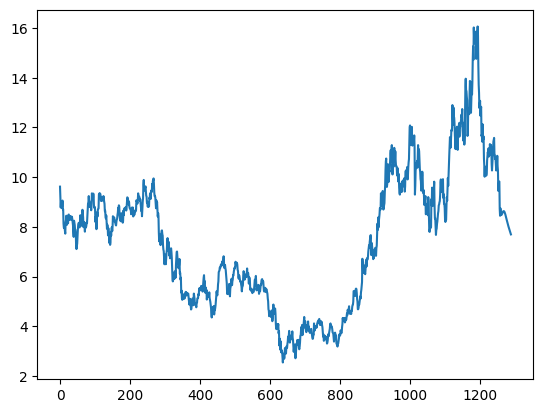

In [57]:
plt.plot(df3)